# About this notebook

This notebook is based on Coursera's course "Machine learning" by Prof. Andrew Ng from Stanford University. In this course, all codes are written in Octave or Matlab. This notebook provides the Python version of the codes.

This notebook is based on the Exerxise 4. Key words are as follows:
- Handwriting recognition
- Neural network
- Regularized cost function and gradient for the neural network
- Feedforward computation
- Backpropagation algorithm
- Gradient checking

# Neural Network

## Data preparation

Data are prepared in .mat format. 
- ex3data1.mat: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
- ex3weights.mat: dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

The matrix X and vector y in the file "ex4data1.mat" are obtained as X<sub>0</sub> and y, respectively:

$$
    \boldsymbol{X_0} =
        \left[\begin{array}{c}
            x_1^{(1)}& x_2^{(1)} & \dots & x_{n_{pixel}}^{(1)} \\
            x_1^{(2)}& x_2^{(2)} & \dots & x_{n_{pixel}}^{(2)} \\ 
            \vdots & \vdots \\
            x_1^{(m)} & x_2^{(m)} & \dots & x_{n_{pixel}}^{(m)} \\
        \end{array}\right]\quad        
    \boldsymbol{y} =
        \left[\begin{array}{c}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\            
            y^{(m)} \\
        \end{array}\right] \quad
$$  

Here, X<sub>0</sub> is (m x n<sub>pixel</sub>)-matrix, and y is m-dimensional vector. The integer n<sub>pixel</sub> represents the number of pixels in an image. The integer m is the number of images and can be regarded as the number of training datasets. One image is stored in each row, i.e., j-th image is expressed by

$$
    \boldsymbol{X_0(j)} =
        \left[\begin{array}{c}
            x_1^{(j)}& x_2^{(j)} & \dots & x_{n_{pixel}}^{(j)} \\
        \end{array}\right].\quad        
$$



In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import copy

path=os.getcwd()

datpath1=path + '/ex4data1.mat'
datpath2=path + '/ex4weights.mat'

dat1=loadmat(datpath1)
dat2=loadmat(datpath2)
print(dat1.keys())
print(dat2.keys())

X0=dat1['X']
X=np.insert(X0, 0, 1, axis=1) # Add 1 to the first column of the matrix X0.
y=dat1['y']
theta1=dat2['Theta1']
theta2=dat2['Theta2']

#total number of the whole pixels 
n_pixel=X0.shape[1] 

#number of features
n=X.shape[1] 

#number of datasets  
m=X0.shape[0]

print('The number of training examples of handwritten digits is m = %d'%m)
print('The number of pixels is n_pixel = %d'%n_pixel)
print('The datasize of X is %d x %d'%(X.shape[0],X.shape[1]))
print('The datasize of y is %d x %d'%(y.shape[0],1))
print('The datasize of theta1 is %d x %d'%(theta1.shape[0],theta1.shape[1]))
print('The datasize of theta2 is %d x %d'%(theta2.shape[0],theta2.shape[1]))

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
The number of training examples of handwritten digits is m = 5000
The number of pixels is n_pixel = 400
The datasize of X is 5000 x 401
The datasize of y is 5000 x 1
The datasize of theta1 is 25 x 401
The datasize of theta2 is 10 x 26


## Demonstration of the feedforward propagation algorithm

Trained parameters for a neural network are already given in the file "<strong>ex4weights.mat</strong>". Hence, the code shown below is just for checking how the feedforward propagation algorithm works. 

In [2]:
from scipy.special import expit

print('The size of X (a1, input layer): %d x %d'%(X.shape[0],X.shape[1]))
a2=expit(np.matmul(X,theta1.T))
a2=np.insert(a2, 0, 1, axis=1)
print('The size of a2 (hidden layer): %d x %d'%(a2.shape[0],a2.shape[1]))
a3=expit(np.matmul(a2,theta2.T))
print('The size of a3 (output layer): %d x %d'%(a3.shape[0],a3.shape[1]))

pred=np.argmax(a3, axis=1)+1
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))
print('Expected value: 97.5 %')

The size of X (a1, input layer): 5000 x 401
The size of a2 (hidden layer): 5000 x 26
The size of a3 (output layer): 5000 x 10
Training set accuracy: 97.52 %
Expected value: 97.5 %


## Comparison of the trained neural network with the handwritten numbers

The function "<strong>ConvertVectorToMatrix</strong>" is defined here to visualize the training data.

In [3]:
def ConvertVectorToMatrix(Vf):
#convert (1 x nf*nf)- or (nf*nf x 1)-vector into (nf x nf) matrix
  
    Vf=Vf.flatten()    
    nf= int(np.sqrt(Vf.shape[0]))
    ret = np.zeros([nf,nf])
    
    element_num=0
    
    for i in range(nf):
        for j in range(nf):        
            ret[i,j]=Vf[element_num]        
            element_num=element_num+1
    return ret

The handwritten digits are randomly chosen from the training data set and visualized. The number expected by the neural network is also shown on the left-bottum of each picture.

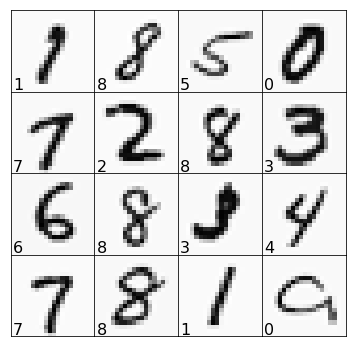

In [4]:
import random

num_fig=16

plt.figure(figsize=(6,6))

for j in range(num_fig):
    plt.subplot(4,4, j+1)
    number=random.randrange(0,m-1,1)
    plt.pcolormesh(np.rot90(ConvertVectorToMatrix(X0[number]),k=1,axes=(0,1)),cmap='Greys')
    plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    
    if pred[number] == 10:
        plt.text(0.5,0.5, '0', fontsize=16)
    else:
        plt.text(0.5,0.5, '%d'%(pred[number]),fontsize=16)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Parameters and functions

It is often convenient to "unroll" parameters and transform back to their original format. In order to do so, some functions for adjusting matrices and vectors will be defined. 

In [5]:
def ConvertMatrixToVector(Mf):
# nf x mf matrix to ((nf * mf) x 1)-dimensional vector    
# 1 2    - >1
# 3 4        2
#              3
#              4

    Vf = Mf.flatten()
    return np.reshape(Vf,(Vf.shape[0],1))

def ConvertVectorToAnyMatrix(Vf,nf,mf):
# Converting (nf*mf x1) or (1 x nf*mf) dimensional vectors into nf x mf matrix
    
    Vf=Vf.flatten()    
    ret=np.reshape(Vf,(nf,mf))
    
    return ret 

def CombineVectors(Vf1,Vf2):
# return n x 1 vector    
    Vf1=Vf1.flatten()
    Vf2=Vf2.flatten()
    
    nf1=Vf1.shape[0]
    nf2=Vf2.shape[0]

    ret=np.append(Vf1,Vf2)
    ret=np.reshape(ret,(nf1+nf2,1))
    return ret

def SeperateVector(Vf,sep):
# input: n-dimensional vector
# output: (sep x 1) and (n-sep)x1 vector

    Vf=Vf.flatten()
    nf=Vf.shape[0]
    
    ret1=np.reshape(Vf[:sep],(sep,1))
    ret2=np.reshape(Vf[sep:],(nf-sep,1))
    return ret1, ret2

Unrolling the parameters "theta1" and "theta2" will be done in the next cell

In [6]:
print("The size of the matrix theta1 is %d x %d"%(theta1.shape[0],theta1.shape[1]))
print("The size of the matrix theta2 is %d x %d"%(theta2.shape[0],theta2.shape[1]))
print("----------------")
theta1_vec=ConvertMatrixToVector(theta1)
theta2_vec=ConvertMatrixToVector(theta2)
print("The matrix theta1 is transformed into %d-dimensional vector"%theta1_vec.size)
print("Recall that %d x %d = %d"%(theta1.shape[0],theta1.shape[1],theta1.shape[0]*theta1.shape[1]))
print("The matrix theta2 is transformed into %d-dimensional vector"%theta2_vec.size)
print("Recall that %d x %d = %d"%(theta2.shape[0],theta2.shape[1],theta2.shape[0]*theta2.shape[1]))
theta_tot=CombineVectors(theta1_vec,theta2_vec)
print("Combining two vectors gives us a new %d-dimensional vector"%theta_tot.size)
print("Recall that %d + %d = %d"%(theta1_vec.size,theta2_vec.size,theta1_vec.size+theta2_vec.size))

The size of the matrix theta1 is 25 x 401
The size of the matrix theta2 is 10 x 26
----------------
The matrix theta1 is transformed into 10025-dimensional vector
Recall that 25 x 401 = 10025
The matrix theta2 is transformed into 260-dimensional vector
Recall that 10 x 26 = 260
Combining two vectors gives us a new 10285-dimensional vector
Recall that 10025 + 260 = 10285


The parameters below should be defined here because they are used in the functions defined later.

In [7]:
input_layer_size = n_pixel #400 
hidden_layer_size=25 
num_labels=10

Five function will be defined.
- <strong>SigmoidGradient</strong>: The first derivative of the sigmoid function.
- <strong>randInitializeWeights</strong>: Based on the sizes of the input layer and hidden layer, theta matrices whose components are random are created.
- <strong>NeuralNetwork</strong>: Newral network with one hidden layer can be implemented.
- <strong>RegNNCostFunctionJ</strong>: Regularized cost function for the neural network
- <strong>RegNNCostGradient</strong>: Gradient of the regularized cost function for the neural network

In [8]:
def SigmoidGradient(z):
    ret = expit(z) - expit(z)**2
    return ret

def randInitializeWeights(L_in,L_out):
    epsilon_init=np.sqrt(6)/np.sqrt(L_in+L_out)
    ret=np.random.uniform(0,1,(L_out,1+L_in)) * 2 * epsilon_init - epsilon_init 
    return ret

def NeuralNetwork(theta_tot_f,Xf):
    ##Forming matrices
    theta1_vec_f, theta2_vec_f = SeperateVector(theta_tot_f,hidden_layer_size*(input_layer_size+1))
    theta1_f = ConvertVectorToAnyMatrix(theta1_vec_f,hidden_layer_size, input_layer_size+1)
    theta2_f = ConvertVectorToAnyMatrix(theta2_vec_f,num_labels, hidden_layer_size+1)
    
    ##Neural network
    a1f=copy.deepcopy(Xf)
    z2f=expit(np.matmul(a1f,theta1_f.T))
    a2f=np.insert(z2f, 0, 1, axis=1)
    a3f=expit(np.matmul(a2f,theta2_f.T))   # 5000 x 10
     
    return a3f

def RegNNCostFunctionJ(theta_tot_f, lambda_f, Xf, Yf):
    ##Forming matrices
    theta1_vec_f, theta2_vec_f = SeperateVector(theta_tot_f,hidden_layer_size*(input_layer_size+1))
    theta1_f = ConvertVectorToAnyMatrix(theta1_vec_f,hidden_layer_size, input_layer_size+1)
    theta2_f = ConvertVectorToAnyMatrix(theta2_vec_f,num_labels, hidden_layer_size+1)
    
    ##Checking data sizes
    mf=Xf.shape[0] # 5000
    
    ##Neural network for calculating hypothesis    
    hf=NeuralNetwork(theta_tot_f,X)
    
    ##Calculatation of the cost
    J=0

    for i in range(mf):
        for k in range(num_labels):
            J=J+(-Yf[i,k]*np.log(hf[i,k]) - (1-Yf[i,k])*np.log(1-hf[i,k]))/mf    
            
    reg_term= sum(sum(np.multiply(theta1_f,theta1_f)))+ sum(sum(np.multiply(theta2_f,theta2_f))) - np.dot(theta1_f[:,0].T,theta1_f[:,0])-np.dot(theta2_f[:,0].T,theta2_f[:,0])
    
    J=J+0.5*lambda_f*reg_term/mf                                                       
                                                           
    return J

def RegNNCostGradient(theta_tot_f, lambda_f, Xf, Yf):
    ##Forming matrices
    theta1_vec_f, theta2_vec_f = SeperateVector(theta_tot_f,hidden_layer_size*(input_layer_size+1))
    theta1_f = ConvertVectorToAnyMatrix(theta1_vec_f,hidden_layer_size, input_layer_size+1)
    theta2_f = ConvertVectorToAnyMatrix(theta2_vec_f,num_labels, hidden_layer_size+1)

    mf=Xf.shape[0] # 5000

    ##Neural network for calculating hypothesis and backpropagation.
    a1f=copy.deepcopy(Xf) # 5000 x 401
    z2f=expit(np.matmul(a1f,theta1_f.T))
    a2f=np.insert(z2f, 0, 1, axis=1) # add 1
        
    d3f=NeuralNetwork(theta_tot_f,a1f)-Yf  #5000 x 10
    theta2_mod=copy.deepcopy(theta2_f[:,1:]) # 10 x 25. Removing the first column.

    d2f =np.matmul(d3f,theta2_mod)*SigmoidGradient(np.matmul(a1f,theta1_f.T)) # 5000 x 25

    Delta1f= np.matmul(d2f.T,a1f)  #25 x 401
    Delta2f= np.matmul(d3f.T,a2f)  #10 x 26

    GradTheta1f=Delta1f/mf 
    GradTheta2f=Delta2f/mf

    #Regularization term
    RegMat1=np.ones((GradTheta1f.shape[0],GradTheta1f.shape[1]))
    RegMat1=np.multiply(theta1_f * lambda_f/mf,RegMat1)
    RegMat1[:,0]=0

    RegMat2=np.ones((GradTheta2f.shape[0],GradTheta2f.shape[1]))
    RegMat2=np.multiply(theta2_f * lambda_f/mf,RegMat2)
    RegMat2[:,0]=0
    
    #Final result (matrices)
    GradTheta1f=GradTheta1f+RegMat1 
    GradTheta2f=GradTheta2f+RegMat2 
    
    #Convert the matrices into one vector
    temp1=ConvertMatrixToVector(GradTheta1f)
    temp2=ConvertMatrixToVector(GradTheta2f)    
    ret=CombineVectors(temp1,temp2)
    
    return ret.flatten() # returns the gradient matrices as a single vector

Let us check the validity of the cost function.

In [9]:
##Preparation of Y matrix
Yk=np.zeros((m,num_labels))

for j in range(m):
    Yk[j,y[j]-1]=1    

##Calculation of the cost function
print('The cost function for the neural network without regularization: %0.6f'%RegNNCostFunctionJ(theta_tot,0,X,Yk))
print('The expected value: 0.287629')
print('The regularized cost function for the neural network (lambda=1): %0.6f'%RegNNCostFunctionJ(theta_tot,1,X,Yk))
print('The expected value: 0.383770')

The cost function for the neural network without regularization: 0.287629
The expected value: 0.287629
The regularized cost function for the neural network (lambda=1): 0.383770
The expected value: 0.383770


## Gradient checking

When performing the neural network, you can unroll the parameters &Theta;<sup>(1)</sup> and &Theta;<sup>(2)</sup> and turn these matrices into a long vector &Theta;<sub>tot</sub> as already mentioned. When you check the gradient of the cost function, you can prepare the following vectors:
$$
    \Theta^{(i+)} =\Theta_{tot}+
        \left[\begin{array}{c}
            0 \\
            0 \\
            \vdots \\  
            \epsilon \\
            \vdots \\
            0 \\
        \end{array}\right] \quad
    \Theta^{(i-)} =\Theta_{tot}-
        \left[\begin{array}{c}
            0 \\
            0 \\
            \vdots \\  
            \epsilon \\
            \vdots \\
            0 \\
        \end{array}\right] \quad.
$$  
The new vectors &Theta;<sup>(i+)</sup> and &Theta;<sup>(i-)</sup> are almost the same as the original vector &Theta;<sub>tot</sub>, except for a small difference originated from the small factor &epsilon; in the i-th component. In the present notebook, &epsilon; = 10<sup>-4</sup> is assumed. Using these slightly-deviated vectors, you can calculate the numerical gradient as
$$
    \frac{J(\Theta^{(i+)})-J(\Theta^{(i-)})}{2\epsilon}.
$$
You can compare the gradient caluculated by this formula and the value returned from the defined function. 

In the next cell, several elements of the gradient will be randomly picked up and compared. The average value of their difference will be also shown and typically less than 1e-9.

In [11]:
from statistics import mean

## preparation of input theta vector with random components
dim=(input_layer_size+1)*hidden_layer_size+(hidden_layer_size+1)*num_labels #10285

theta1_test=randInitializeWeights(input_layer_size, hidden_layer_size)
theta2_test=randInitializeWeights(hidden_layer_size, num_labels)

theta1_test_vec=ConvertMatrixToVector(theta1_test)
theta2_test_vec=ConvertMatrixToVector(theta2_test)

theta_tot_test=CombineVectors(theta1_test_vec,theta2_test_vec)

## initial parameter
lambda_test=0.1
eps=0.0001

testnum=10
diff=np.zeros(testnum)

## numerical gradient
for j in range(testnum):
    ran_num=random.randrange(0,dim,1)

    dtheta=np.zeros((dim,1))
    dtheta[ran_num]=eps
    
    cost_plus    = RegNNCostFunctionJ(theta_tot_test+dtheta, lambda_test, X, Yk)
    cost_minus = RegNNCostFunctionJ(theta_tot_test-dtheta, lambda_test, X, Yk)
    calc_grad = 0.5 * (cost_plus - cost_minus) /eps
    diff[j]=calc_grad-RegNNCostGradient(theta_tot_test, lambda_test, X, Yk)[ran_num]
    
    print("Element: %d | Finite difference: %f | Gradient function: %f"%(ran_num, calc_grad, RegNNCostGradient(theta_tot_test, lambda_test, X, Yk)[ran_num]))

print('Average of the difference: %f e-10'%(mean(diff)*10000000000))

Element: 74 | Finite difference: -0.004560 | Gradient function: -0.004560
Element: 2250 | Finite difference: 0.002591 | Gradient function: 0.002591
Element: 1118 | Finite difference: 0.002740 | Gradient function: 0.002740
Element: 3934 | Finite difference: 0.003917 | Gradient function: 0.003917
Element: 9792 | Finite difference: -0.003630 | Gradient function: -0.003630
Element: 10273 | Finite difference: 0.096673 | Gradient function: 0.096673
Element: 2274 | Finite difference: 0.007535 | Gradient function: 0.007535
Element: 9090 | Finite difference: 0.000289 | Gradient function: 0.000289
Element: 6647 | Finite difference: -0.031575 | Gradient function: -0.031575
Element: 6219 | Finite difference: 0.013969 | Gradient function: 0.013969
Average of the difference: -1.086995 e-10


## Learning parameters

In the next cell, the neural network model will be defined as a function.

In [98]:
import copy
from scipy.optimize import minimize

def NeuralNetworkTraining(num_iter_f,lambda_f,Xf,Yf):
    ## Preparation of random theta parameters
    theta1_init=randInitializeWeights(input_layer_size, hidden_layer_size)
    theta2_init=randInitializeWeights(hidden_layer_size, num_labels)

    theta1_init_vec=ConvertMatrixToVector(theta1_init)
    theta2_init_vec=ConvertMatrixToVector(theta2_init)

    theta_tot_init=CombineVectors(theta1_init_vec,theta2_init_vec)

    ## Minimizing the cost
    result = minimize(fun=RegNNCostFunctionJ,x0= theta_tot_init, args=(lambda_f, Xf, Yf), method='CG', jac=RegNNCostGradient, options={'maxiter':num_iter_f,'disp':True})
    
    return result

The training set accuracy will be shown. Under the conditions shown below, you can expect the training accuracy of about 95.3 %. This may vary by about 1% because of the random initialization.
- lambda_test=1
- number of iteration = 50
- minimization: method = 'CG'

In [99]:
num_iter=50
lambda_test=1

result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)

theta_optimized=result.x
hf=NeuralNetwork(theta_optimized,X)
pred=np.argmax(hf, axis=1)+1

print('-------------------------------------------------------------------------')
print('Training set accuracy total: {} %'.format(np.mean(pred == y.ravel())*100))
print('-------------------------------------------------------------------------')
print('Training set accuracy for 0: {} %'.format(np.mean(pred[:499] == y[:499].ravel())*100))
print('Training set accuracy for 1: {} %'.format(np.mean(pred[500:999] == y[500:999].ravel())*100))
print('Training set accuracy for 2: {} %'.format(np.mean(pred[1000:1499] == y[1000:1499].ravel())*100))
print('Training set accuracy for 3: {} %'.format(np.mean(pred[1500:1999] == y[1500:1999].ravel())*100))
print('Training set accuracy for 4: {} %'.format(np.mean(pred[2000:2499] == y[2000:2499].ravel())*100))
print('Training set accuracy for 5: {} %'.format(np.mean(pred[2500:2999] == y[2500:2999].ravel())*100))
print('Training set accuracy for 6: {} %'.format(np.mean(pred[3000:3499] == y[3000:3499].ravel())*100))
print('Training set accuracy for 7: {} %'.format(np.mean(pred[3500:3999] == y[3500:3999].ravel())*100))
print('Training set accuracy for 8: {} %'.format(np.mean(pred[4000:4499] == y[4000:4499].ravel())*100))
print('Training set accuracy for 9: {} %'.format(np.mean(pred[4500:4999] == y[4500:4999].ravel())*100))

         Current function value: 0.453154
         Iterations: 50
         Function evaluations: 111
         Gradient evaluations: 111
Training set accuracy total: 95.92 %
-------------------------------------------------------------------------
Training set accuracy for 0: 98.39679358717434 %
Training set accuracy for 1: 97.99599198396794 %
Training set accuracy for 2: 94.18837675350701 %
Training set accuracy for 3: 92.58517034068137 %
Training set accuracy for 4: 96.39278557114228 %
Training set accuracy for 5: 94.78957915831663 %
Training set accuracy for 6: 98.19639278557113 %
Training set accuracy for 7: 96.39278557114228 %
Training set accuracy for 8: 95.99198396793587 %
Training set accuracy for 9: 94.18837675350701 %


## Visualization of the hidden layer

### Visualization

The function "<strong>VisualizeOptTheta</strong>" is defined to visualize the representation captured by the hidden layer. The optimized matrix &Theta;<sup>(1)</sup> is 25 x 401 matrix. If you omit the first colum, you can get 25 x 400 matrix. The 400 elements can be converted into a 20 x 20 image.

In [113]:
def VisualizeOptTheta(theta_opt_f):
    theta1_optvec_f, theta2_optvec_f = SeperateVector(theta_opt_f,hidden_layer_size*(input_layer_size+1))
    theta1_opt_f = ConvertVectorToAnyMatrix(theta1_optvec_f,hidden_layer_size, input_layer_size+1)
 
    theta1_opt_mod_f=theta1_opt_f[:,1:]

    plt.figure(figsize=(6,6))

    num_fig_f=25 

    for j in range(num_fig_f):
        plt.subplot(5,5, j+1)
        plt.pcolormesh(np.rot90(ConvertVectorToMatrix(theta1_opt_mod_f[j]),k=1,axes=(0,1)),cmap='Greys')
        plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)

        plt.text(0.5,15.7, '%d'%(j),fontsize=16,color='blue')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

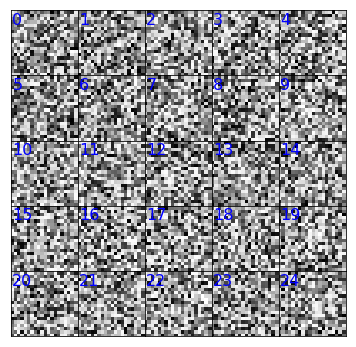

In [114]:
VisualizeOptTheta(theta_optimized)

### Dependence of the &Theta;<sub>1</sub> on the number of iteration

         Current function value: 3.818101
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


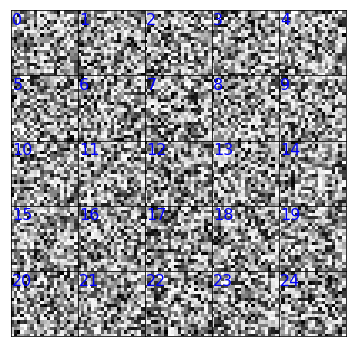

In [115]:
lambda_test=0.1
num_iter=1
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 1.219225
         Iterations: 10
         Function evaluations: 19
         Gradient evaluations: 19


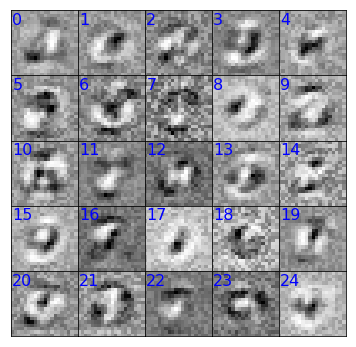

In [116]:
lambda_test=0.1
num_iter=10
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 0.111216
         Iterations: 100
         Function evaluations: 263
         Gradient evaluations: 263


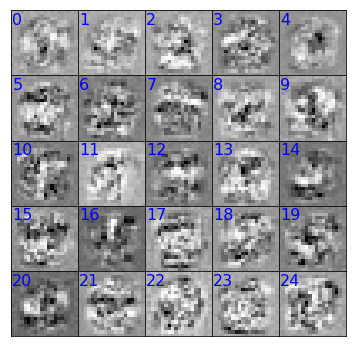

In [117]:
lambda_test=0.1
num_iter=100
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 0.071740
         Iterations: 300
         Function evaluations: 846
         Gradient evaluations: 846


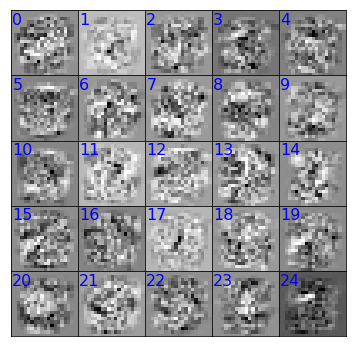

In [118]:
lambda_test=0.1
num_iter=300
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

### Dependence of the &Theta;<sub>1</sub> on the parameter &lambda;

         Current function value: 0.022759
         Iterations: 100
         Function evaluations: 292
         Gradient evaluations: 292


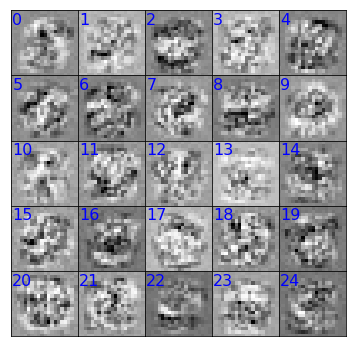

In [119]:
lambda_test=0.0
num_iter=100
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 0.125497
         Iterations: 100
         Function evaluations: 242
         Gradient evaluations: 242


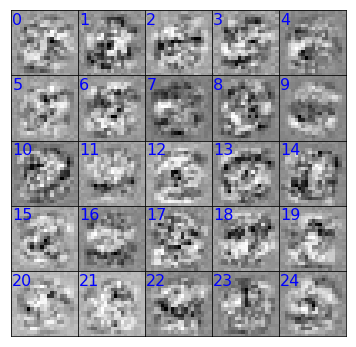

In [120]:
lambda_test=0.1
num_iter=100
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 0.363021
         Iterations: 100
         Function evaluations: 234
         Gradient evaluations: 234


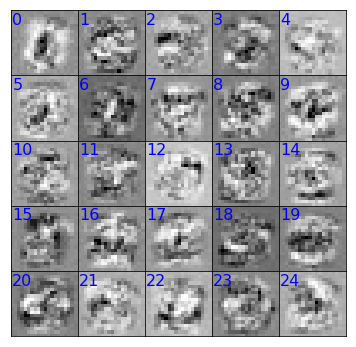

In [121]:
lambda_test=1.0
num_iter=100
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

         Current function value: 0.999717
         Iterations: 100
         Function evaluations: 201
         Gradient evaluations: 201


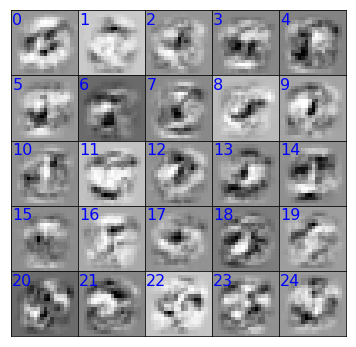

In [122]:
lambda_test=10.0
num_iter=100
result=NeuralNetworkTraining(num_iter,lambda_test,X,Yk)
theta_optimized=result.x
VisualizeOptTheta(theta_optimized)

## Dependence of the training accuracy on the number of iteration

In [51]:
def NN_TrainingAccuracy(num_iter_f, lambda_f):
    ## Preparation of random theta parameters
    theta1_init=randInitializeWeights(input_layer_size, hidden_layer_size)
    theta2_init=randInitializeWeights(hidden_layer_size, num_labels)

    theta1_init_vec=ConvertMatrixToVector(theta1_init)
    theta2_init_vec=ConvertMatrixToVector(theta2_init)

    theta_tot_init=CombineVectors(theta1_init_vec,theta2_init_vec)

    ## Minimizing the cost
    result = minimize(fun=RegNNCostFunctionJ,x0= theta_tot_init, args=(lambda_f, X, Yk), method='CG', jac=RegNNCostGradient, options={'maxiter':num_iter_f,'disp':False})

    theta_optimized=result.x
    hf=NeuralNetwork(theta_optimized,X)
    pred=np.argmax(hf, axis=1)+1

    return np.mean(pred == y.ravel())*100 # returns the training accuracy

<strong>IT WILL TAKE LONG TIME IF YOU RUN THE NEXT CELL.</strong>

In [68]:
########
num_datpoint=40

num_iter=10 #initial value
diter=10 
lambda_test=1
#########

x_graph=np.linspace(diter,num_datpoint*diter,num_datpoint)
y_graph=np.zeros(num_datpoint)

for j in range(num_datpoint):
    print('%d/%d'%(j+1,num_datpoint))
    y_graph[j] = NN_TrainingAccuracy(num_iter, lambda_test)
    num_iter=num_iter+diter

1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40
40/40


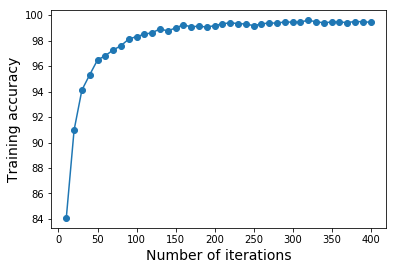

In [72]:
plt.plot(x_graph,y_graph,marker='o')
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Training accuracy', fontsize=14)
plt.show()

## Dependence of the training accuracy on the parameter &lambda;

<strong>IT WILL TAKE LONG TIME IF YOU RUN THE NEXT CELL.</strong>

In [88]:
########
num_datpoint=100

num_iter=100
lambda_test=0#initial value
dlam=0.1 
#########

x_graph=np.linspace(0,(num_datpoint-1)*dlam,num_datpoint)
y_graph=np.zeros(num_datpoint)

for j in range(num_datpoint):
    y_graph[j] = NN_TrainingAccuracy(num_iter, lambda_test)
    print('%d/%d'%(j+1,num_datpoint))
    lambda_test=lambda_test+dlam
    
print('Finish')

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
Finish


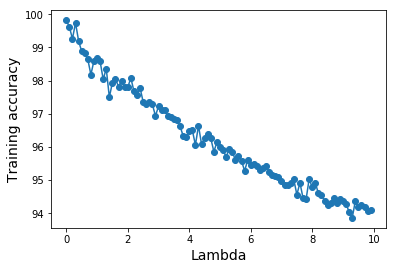

In [89]:
plt.plot(x_graph,y_graph,marker='o')
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Training accuracy', fontsize=14)
plt.show()

<strong>IT WILL TAKE LONG TIME IF YOU RUN THE NEXT CELL.</strong>

In [94]:
########
num_datpoint=50

num_iter=100
lambda_test=0#initial value
dlam=0.01 
#########

x_graph=np.linspace(0,(num_datpoint-1)*dlam,num_datpoint)
y_graph=np.zeros(num_datpoint)

for j in range(num_datpoint):
    y_graph[j] = NN_TrainingAccuracy(num_iter, lambda_test)
    print('%d/%d'%(j+1,num_datpoint))
    lambda_test=lambda_test+dlam
    
print('Finish')

1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50
50/50
Finish


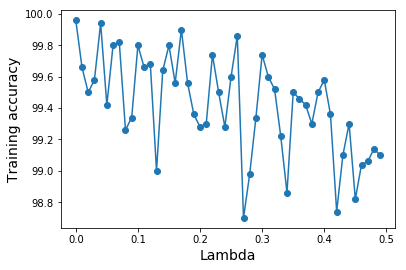

In [95]:
plt.plot(x_graph,y_graph,marker='o')
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Training accuracy', fontsize=14)
plt.show()